<a href="https://csdms.colorado.edu/wiki/ESPIn2020"><img style="float: center; width: 75%" src="../../media/ESPIn.png"></a>

## Advection

@Auhtor: Benjamin Campforts

### Introduction

- **What is advection?** Advection is a transport mechanism of a substance or conserved property by a fluid due to the fluid's bulk motion (Wallace and Hobbs, 2006).

- **Examples:**  What can be advected: temperature, moisture, aerosols, ...

- **Why discretise?** Because not for all solutions the analytical solution is known, in fact, most of the time it is not known. Especially in the field of earth sciences where sets of simultaneous, nonlinear, partial differential equations has to be solved using known analytical methods. To solve such coupled equations, numerical computational methods are required to discretize and solve the PDE's on a lattice. In this notebook, we will only deal with a finite difference scheme, using the simplest form of a truncated Taylor series expansion. Many alternative methods are available to solve PDE's. Nevertheless, many models in geosciences use finite difference methods, because of their conceptual simplicity and ease of coding (Prof. N. Van Lipzig).

### The advection equation: some theoretical background###

A concepturally very simple PDE is the Advection Equation: 

$$\frac{\partial C}{\partial t} = -v \frac{\partial C}{\partial x}
\label{eq:1}\tag{1}$$
or 
$$\frac{\partial C}{\partial t} +v \frac{\partial C}{\partial x}=0
\label{1b}$$

where $C$ is the aerosol concentration and $v$ is a constant windspeed at which aerosol concentrations are advected. The equation above is a prototype of an **initial value problem**: The solution is obtained by using the known initial values and marching or advancing in time. The solution of this equation can be obtained directly from the initial conditions:

$$ C(x,t) = C(x-vt,0) \label{eq:2}\tag{2}$$

In the following we will discretize Eq. $\ref{eq:1}$ using a first order, finite difference upwind scheme. 

All FDM's can be represented with a numerical stencil:

<img src="../../media/Stencil1.png" style="width:3in;height:1in" />

For the upwind scheme in particular, we only need three nodes: 
<img src="../../media/Stencil2.png" style="width:3in;height:1.25in" />

**BUT** the nodes you need to consider depend on the sign of the velocity: 
<img src="../../media/UpwindScheme.png" style="width:6.5in;height:3.76in" />

If $v$ is positive, than the direction of the Aerosol flow is from left-to-right along the x domain. To capture such a positive flow, the upwind discretisation scheme uses the info from the neighbouring node in the upwind direction, that is, the node to the left, indicated by j-1 on the sketch. In this case the the Finite Difference Equation (FDE) of Eq. $\ref{eq:1}$ can be written as:

$$\frac{\tilde{C}_j^{n+1} - \tilde{C}_j^n}{\Delta t} + c
\frac{\tilde{C}_j^n - \tilde{C}_{j-1}^n}{\Delta x} = 0
\label{eq:3}\tag{3}$$

If however, the velocity is negative, the FDE becomes: 

$$\frac{\tilde{C}_j^{n+1} - \tilde{C}_j^n}{\Delta t} + c
\frac{\tilde{C}_{j+1}^n \tilde{C}_j^n}{\Delta x} = 0
\label{eq:4}\tag{4}$$

To obtain this equation, we have taken discrete values for $x$ and $t$: $x_j=j\Delta x$, $t_n = n \Delta t$. The solution of the finite difference equation is also defined at the discrete points ($j\Delta x$,$n \Delta t$): $\tilde{C}_j^n=\tilde{C}(j\Delta x,n \Delta t)$. Note that we used $C$ to denote the solution of the PDE
(continuous) and $\tilde{C}$ to denote the solution of the finite difference equation (FDE), a discrete solution. In the remainder of the notebook, we will use the symbol $C$ for both the analytical and numerical solution.


### The advection equation: Hands on ###

In the following we will calculate the temperature anomaly of a discrete, sine shaped temperature perturbation and visualize the result.

- Carefully scan each line of the script and try to understand the structure
- Run the script to generate a wave 
- This wave can represent temperature over the 1D domain or a concentration of a pollutant
- Play with parameters (amplitude/wave length) to understand its meaning

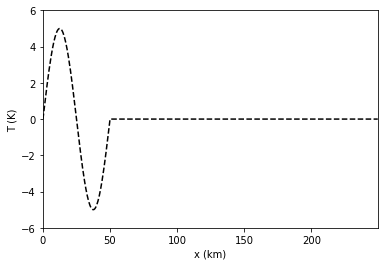

In [1]:
# --------------------------------------------------------------------
# Code to calculate the temperature anomaly of a discrete, 
# sine shaped perturbation and visualise the result
# --------------------------------------------------------------------
                          
# --------------------------------------------------------------------
# initialisation
# --------------------------------------------------------------------
import numpy as np
from matplotlib import pyplot as plt

# initialisation of model constants
dx     = 500      # spatial step in m 
lam    = 5e4      # wavelength
Lx     = 25e4     # size of the domain
ampl   = 5        # amplitude (K)

# initialisation of variables (including scalars, arrays and matrices)
x = np.arange(start= 0, stop = Lx , step = dx)
# Logical operations
b = x <= lam
c = x >  lam
# print(c)

# --------------------------------------------------------------------
# manipulations
# --------------------------------------------------------------------
# get sine wave
y    = np.zeros_like(x)
y[b] = ampl*np.sin(x[b]*2*np.pi/lam)
y[c] = 0
# --------------------------------------------------------------------
# Visualisation
# --------------------------------------------------------------------
# plot the graph
plt.figure()
plt.plot(x/1.e3, y, '--k') 
plt.ylim((-6, 6))
plt.xlim((0, max(x/1e3)))
plt.xlabel('x (km)')
plt.ylabel('T (K)')
plt.show()

Now, lets solve the advection equation using the upwind FDE. You can use either for loops or vector operations (numpy arrays) to iterate over the temperature vector in space. Start with the solution for positive velocity (that is, solve Eq. 3) and assume: 

- Wind speed $v$ = 10 m/s
- Total model run time = 3 hours
- calculate dt using the CFL criterion: 
$dt = \frac{0.9v}{dx}$
- dx = 500 m (see previous code block)
- Periodic boundary conditions: the solution at the left boundary depends on the solution at the right boundary if velocity is positive and vice versa for negative velocities. 
- Plot the wave every $10^5$ iterations 

0.018


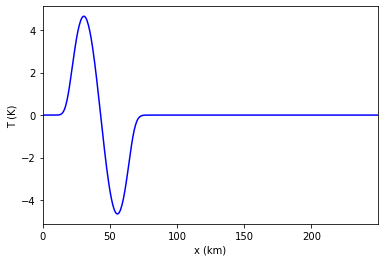

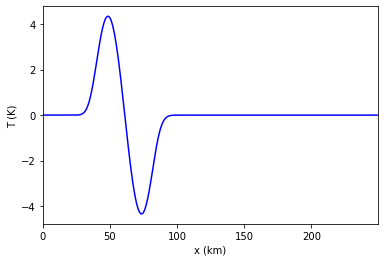

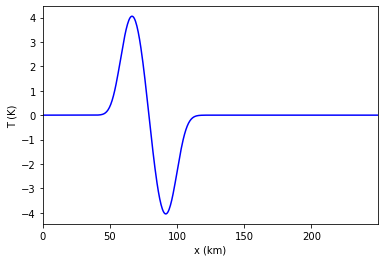

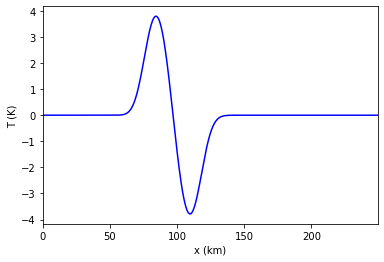

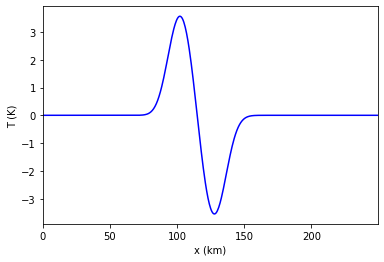

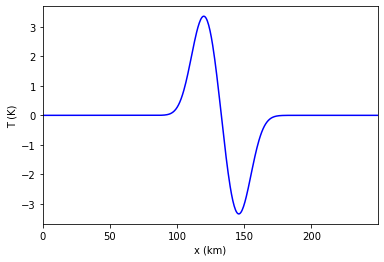

In [2]:
# data, parameter values
v    = 10 #m/s
totT = 3600 *3#in sec
dt   = 0.9*v/dx
print(dt)

# Initialise numpy array 
T_num = np.zeros_like(y)
T_num[:] = y

# Numerical solution
it = 0

while it*dt<totT:
    it +=1
    if v>0:
        T_num[1:] = T_num[1:] - v*dt/dx*(T_num[1:]-T_num[0:-1])
        # BC
        T_num[0] = T_num[-1]    
    
    if it%1e5==0: 
        plt.plot(x/1.e3, T_num, 'b') 
        plt.xlim((0, max(x/1e3)))
        plt.xlabel('x (km)')
        plt.ylabel('T (K)')
        plt.show()

Now, set the wind speed $v$ to -10 m/s and calculate the advection equation for negative velocities using Eq. 4. Copy paste your previous solution and add the negative component to it. Do not forget to reset the Temperature array before you start. 

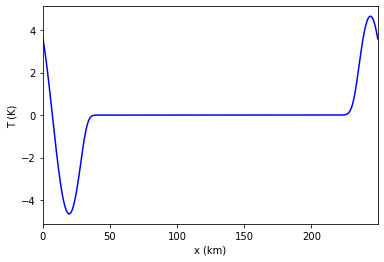

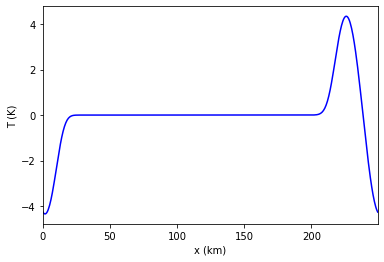

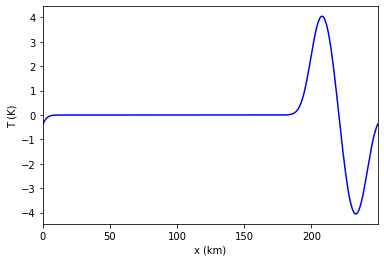

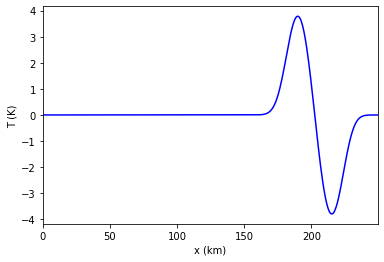

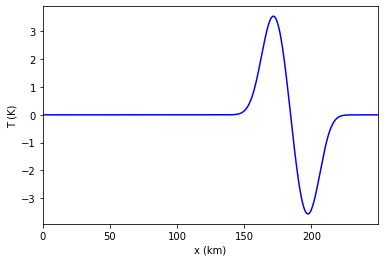

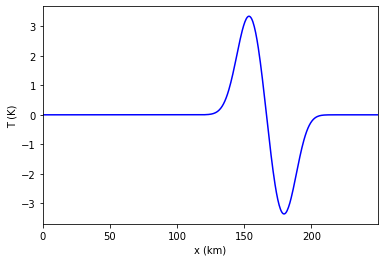

In [3]:
v    = -10 #m/s
T_num = np.zeros_like(y)
T_num[:] = y
it = 0
while it*dt<totT:
    it +=1
    if v>0:
        T_num[1:] = T_num[1:] - v*dt/dx*(T_num[1:]-T_num[0:-1])
        # BC
        T_num[0] = T_num[-1]  
    elif v<0:
        T_num[0:-1] = T_num[0:-1] - v*dt/dx*(T_num[1:]-T_num[0:-1])        
        # BC
        T_num[-1] = T_num[0]       
    
    if it%1e5==0: 
        plt.plot(x/1.e3, T_num, 'b') 
        plt.xlim((0, max(x/1e3)))
        plt.xlabel('x (km)')
        plt.ylabel('T (K)')
        plt.show()

Can you find an analytical solution for this problem? Implement eq. 2. You need just one line of code. plot and compare with the numerical solution. What is going on here. What can we do to resolve this issue? 

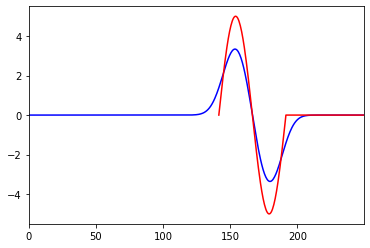

In [4]:
x_an = x + np.mod(totT*v, x[-1])
plt.plot(x*1e-3, T_num, 'b') 
plt.plot(x_an*1e-3, y, '-r')
plt.xlim((x[0],x[-1]*1e-3))
plt.show()

## Practice your skills: Eyjafjallajokull- Part 2

Back to the problem of the Eyjafjallajokull volcano. This time we will solve the advection diffusion equation in 1D: 

$$\frac{\partial C}{\partial t} = -v \frac{\partial C}{\partial x} + D\frac{\delta^2 C}{\delta x^2} 
\label{eq:4}\tag{4}$$

Copy past your script form the notebook where you solved the case for pure diffusion. 
Now adjust the script by adding advection. You can use the code derived in the previous blocks. 

You only need one additional model parameter: the advection velocity $v$. 
- Assume an advection velocity of 10 km/h (that is, the wind speed at which ash aerosols are advected towards the continent)
- Calculate the time step by combining the CFL criterium for advection (see above) and diffusion 
- Same question: after how many hours do we get 5 ppm ash aerosols in Brussels?

dt is: 0.45hours


<Figure size 432x288 with 0 Axes>

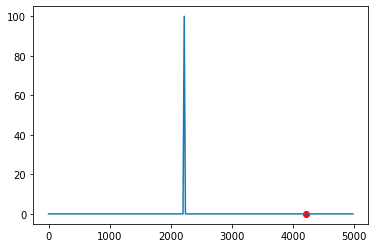

<Figure size 432x288 with 0 Axes>

In [5]:
#physics
D = 25
v = 10
Lx = 5000
time =0

#numerical properties
dx = 20
x = np.arange(start=0, stop=Lx, step=dx)
nx =len(x)
nt = 10000
nout = 1000

# Location of volcano and Brussels
ind_vol= int(2220/dx)
ind_Bru= int(4220/dx)

C_ini  = 100
C_rate = 100
Cstart = 0
Cend  = 0
C =np.zeros(x.shape)

C[0] = Cstart
C[ind_vol] = C_ini
C[-1] = Cend

plt.figure()
plt.plot(x,C)
plt.scatter(x[ind_Bru],C[ind_Bru],c='r')

dt_a = 0.9*v/dx
dt_d = dx*dx/D/2.5
dt = min(dt_a,dt_d)
print('dt is: ' + str(dt) + 'hours')

it = 0
plt.figure()

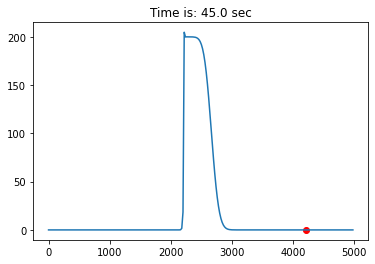

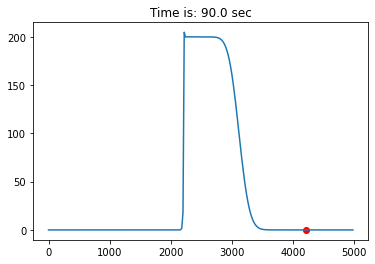

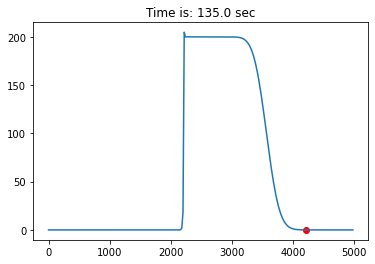

Concentration reached after: 164 hours
or : 6 days


In [6]:
it =0 
while C[ind_Bru]<5:
    it+=1
    
    # Advection 
    if v>0:
        C[1:] -= v*dt/dx*(C[1:]-C[0:-1])        
    elif v<0:
        C[0:-1] -= v*dt/dx*(C[1:]-C[0:-1])      
        
    # Boundary conditions
    C[0] = Cstart
    C[-1] = Cend    
        
    # Diffusion 
    q = -D*np.diff(C)/dx    
    C[1:-1] = C[1:-1] - dt*np.diff(q)/dx  
    
    # Source term
    C[ind_vol] += C_rate*dt
    

    if it%100==0:        
        plt.plot(x,C)
        plt.scatter(x[ind_Bru],C[ind_Bru],c='r')
        plt.title('Time is: ' + str(it*dt) + ' sec')    
        plt.show()
            
print('Concentration reached after: ' + str(int(it*dt)) + ' hours')
print('or : ' + str(int(it*dt/24)) + ' days')

That's more like it! Congratulations, you have reached the end of this notebook!